<a href="https://colab.research.google.com/github/abhishekmishrabareilly/Time_Seriese_Analysis/blob/main/Gold_Price_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gold Price Forcasting**

### **Data import and data preprocessing**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Time Series Analysis/Copy of gold_monthly_csv.csv')

In [ ]:
data.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [ ]:
data.isnull().sum()

Date     0
Price    0
dtype: int64

* Data have no null value

### **Date into Datetime**

In [ ]:
# Convert Month into Datetime
data['Date']=pd.to_datetime(data['Date'])

In [ ]:
data.head()

,Date,Price
0,1950-01-01,34.73
1,1950-02-01,34.73
2,1950-03-01,34.73
3,1950-04-01,34.73
4,1950-05-01,34.73


### **Making date as index**

In [ ]:
data.set_index('Date',inplace=True)

In [ ]:
data.head()

,Price
Date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


### **Check data Describe**

In [ ]:
data.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


## **Visualize the Data**

<Axes: xlabel='Date'>

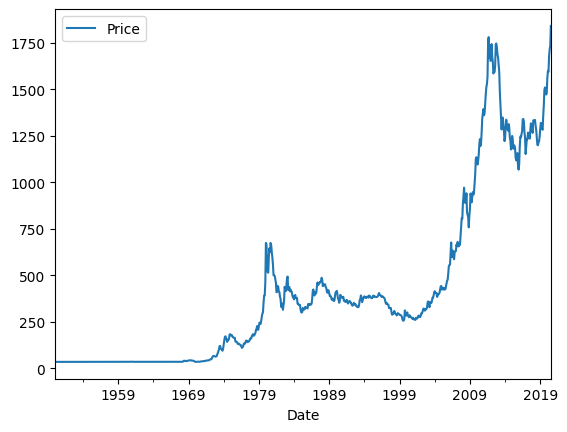

In [ ]:
data.plot()

## **Testing For Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(data['Price'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(data['Price'])

ADF Test Statistic : 0.8143240077835248
p-value : 0.9918639010465631
#Lags Used : 11
Number of Observations Used : 835
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### **Differencing**

In [ ]:
data['Price First Difference'] = data['Price']-data['Price'].shift(1)
data.head()

,Price,Sales First Difference
Date,,
1950-01-01,34.73,NaN
1950-02-01,34.73,0.0
1950-03-01,34.73,0.0
1950-04-01,34.73,0.0
1950-05-01,34.73,0.0


In [ ]:
data['Seasonal First Difference']=data['Price']-data['Price'].shift(12)
data.head()

,Price,Sales First Difference,Seasonal First Difference
Date,,,
1950-01-01,34.73,NaN,NaN
1950-02-01,34.73,0.0,NaN
1950-03-01,34.73,0.0,NaN
1950-04-01,34.73,0.0,NaN
1950-05-01,34.73,0.0,NaN


### **Again test dickey fuller test**

In [ ]:
## Again test dickey fuller test
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.672686336787491
p-value : 9.467760473934225e-05
#Lags Used : 17
Number of Observations Used : 817
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

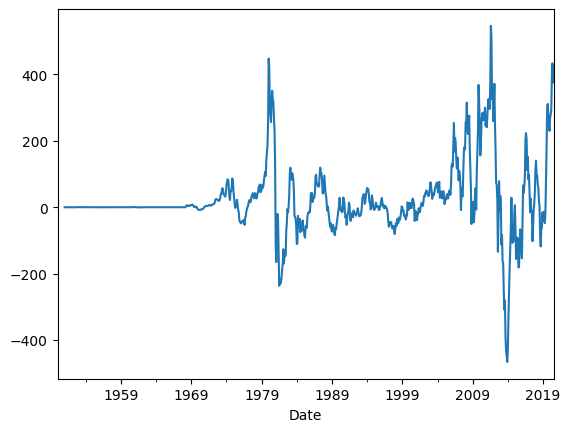

In [ ]:
data['Seasonal First Difference'].plot()

## **Auto Regressive Model**

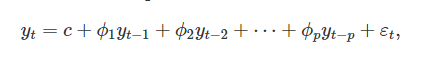

In [ ]:
from pandas.plotting import autocorrelation_plot


### **Check auto-Corelation plot for "Price" column**

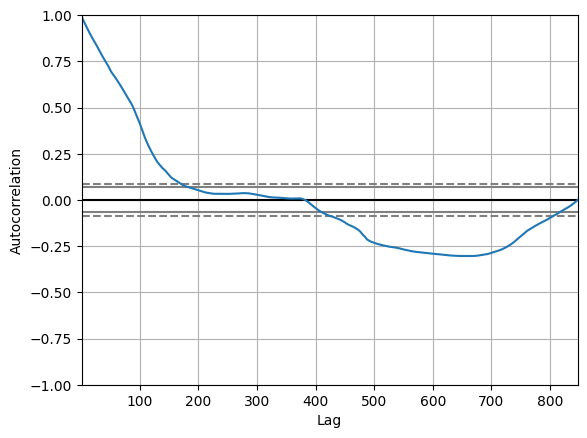

In [ ]:
autocorrelation_plot(data['Price'])
plt.show()

### **Final Thoughts on Autocorrelation and Partial Autocorrelation**
* **Identification of an AR model is often best done with the PACF.**

  * For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

* **Identification of an MA model is often best done with the ACF rather than the PACF.**

  * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

**p,d,q p AR model lags d differencing q MA lags**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


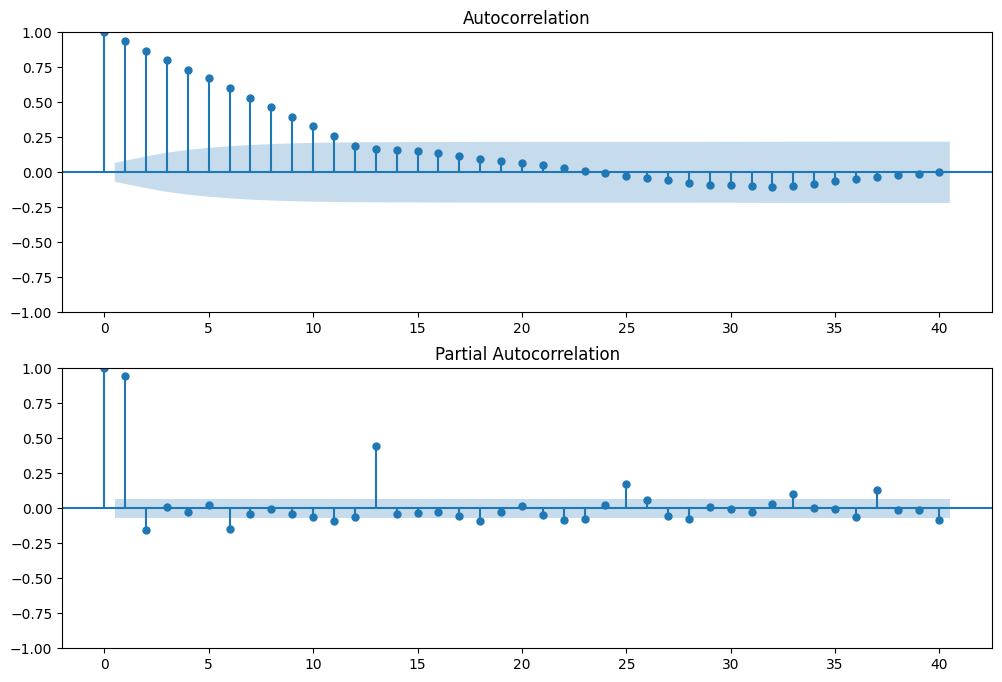

In [80]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

## **Applying ARIMA, SARIMAX**

In [81]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [82]:
model=ARIMA(data['Price'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [83]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  847
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3894.605
Date:                Sat, 17 Jun 2023   AIC                           7795.209
Time:                        10:08:33   BIC                           7809.431
Sample:                    01-01-1950   HQIC                          7800.658
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5398      0.042    -12.838      0.000      -0.622      -0.457
ma.L1          0.7664      0.031     24.425      0.000       0.705       0.828
sigma2       583.4947     10.859     53.736      0.000     562.212     604.777
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):              6039.95
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):             524.03   Skew:                             1.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

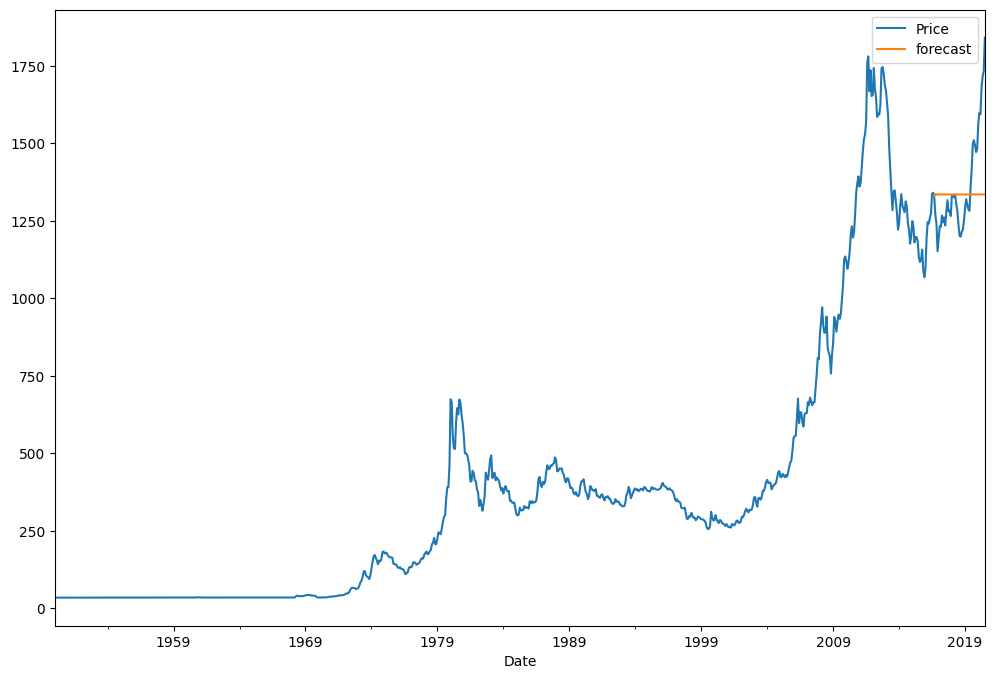

In [88]:
data['forecast']=model_fit.predict(start=800,end=847,dynamic=True)
data[['Price','forecast']].plot(figsize=(12,8))

In [89]:
model=sm.tsa.statespace.SARIMAX(data['Price'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

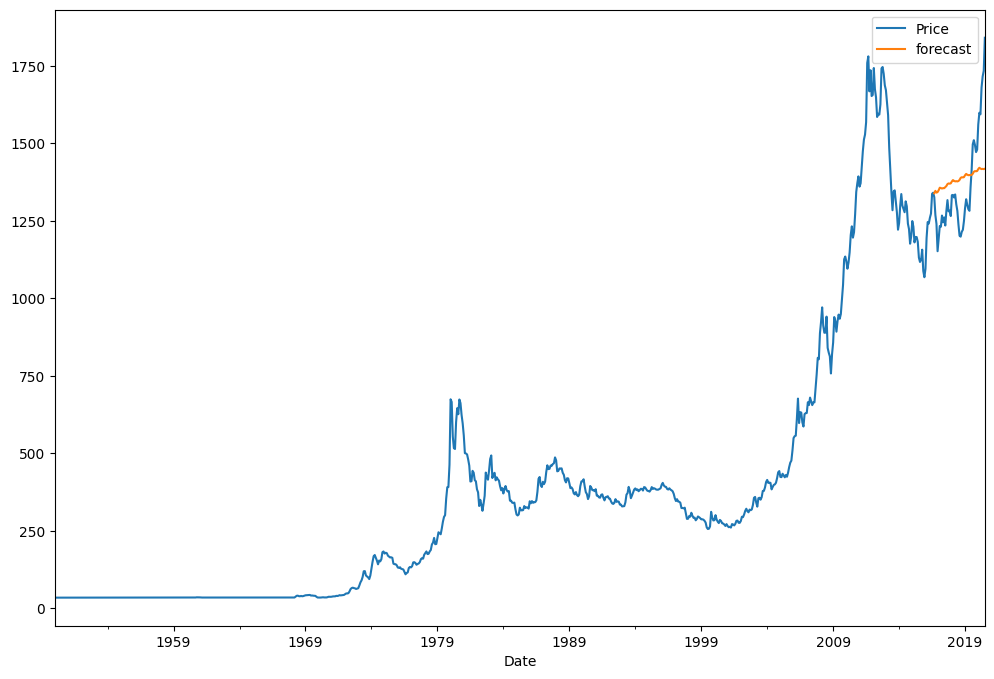

In [91]:
data['forecast']=results.predict(start=800,end=847,dynamic=True)
data[['Price','forecast']].plot(figsize=(12,8))

In [90]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [92]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [93]:
future_datest_df.tail()

,Price,Sales First Difference,Seasonal First Difference,forecast
2022-02-01,NaN,NaN,NaN,NaN
2022-03-01,NaN,NaN,NaN,NaN
2022-04-01,NaN,NaN,NaN,NaN
2022-05-01,NaN,NaN,NaN,NaN
2022-06-01,NaN,NaN,NaN,NaN


In [94]:
future_df=pd.concat([data,future_datest_df])

<Axes: >

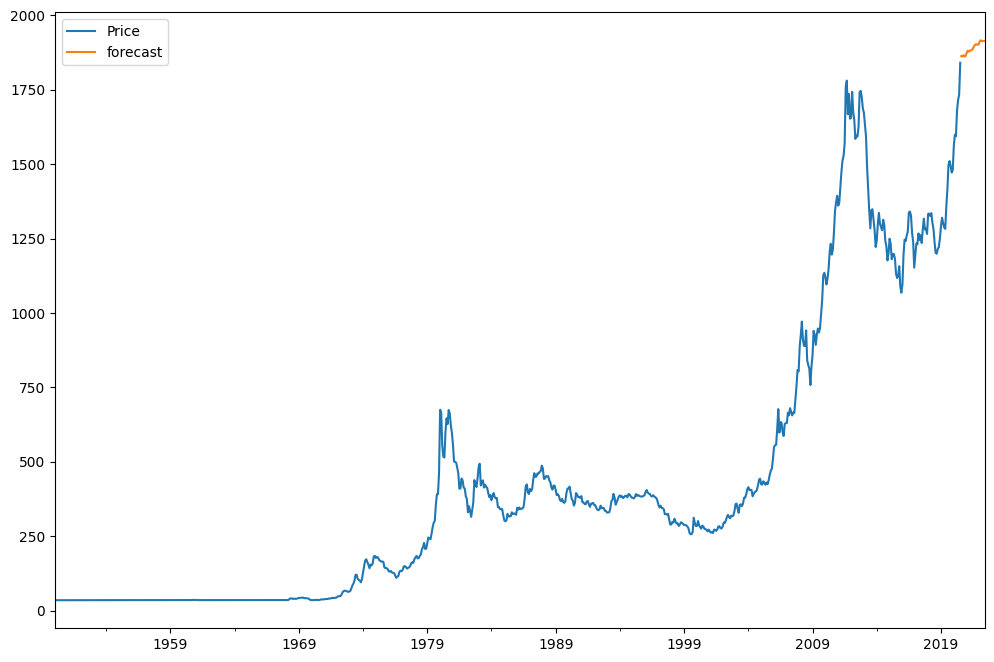

In [96]:
future_df['forecast'] = results.predict(start = 847, end = 900, dynamic= True)
future_df[['Price', 'forecast']].plot(figsize=(12, 8))